# **БФБО-05-23 Баранов Арсений Юрьевич**

** Фильтрация изображений в Python с использованием Pillow **

Фильтрация изображений — это процесс изменения или улучшения изображения. Он может использоваться для улучшения некоторых характеристик (краев) изображения или даже для удаления некоторых характеристик изображения. Фильтрация изображений может включать такие шаги, как сглаживание, повышение резкости, улучшение краев, обнаружение краев, удаление шума и т. д. Фильтрация изображений может быть последним шагом в обработке изображений, где результатом фильтрации изображения является ожидаемое изображение, или это может быть даже промежуточный шаг, где отфильтрованное изображение может использоваться чем-то другим, например, машинным обучением. В Python есть библиотеки, такие как Pillow, Scikit-Image, OpenCV, Scipy и т. д. В рамках этого руководства мы объясним, как можно использовать PILLOW для фильтрации изображений. Pillow имеет список предопределенных функций фильтрации изображений, которые могут значительно упростить нашу задачу фильтрации изображений. Мы объясним отдельные фильтры с помощью примеров.  
В подушке доступны два типа фильтров. Некоторые из них непараметризованные, а другие — параметризованные. Параметризованные фильтры позволяют изменять свойства фильтров, предоставляя различные значения параметров. Все фильтры доступны через модуль ImageFilter подушки.  
Ниже приведен список непараметризованных фильтров.

- BLUR
- CONTOUR
- DETAIL
- EDGE_ENHANCE
- EDGE_ENHANCE_MORE
- EMBOSS
- FIND_EDGES
- SHARPEN
- SMOOTH
- SMOOTH_MORE

In [1]:
from PIL import Image
from PIL import ImageFilter

Ниже мы загрузили два изображения, которые будут использоваться для объяснения использования различных фильтров.

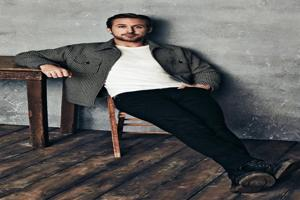

In [8]:
Gosling = Image.open("Gosling.jpg")
resized_image = Gosling.resize((300, 200))
resized_image.save('Gosling2.jpg')
Gosling = Image.open("Gosling2.jpg")
Gosling

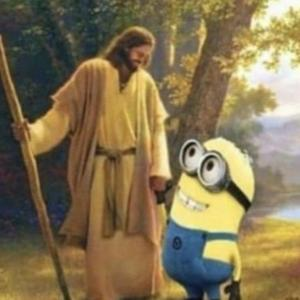

In [11]:
JesusMin = Image.open("JesusMin.jpg")
resized_image = JesusMin.resize((300, 300))
resized_image.save('JesusMin2.jpg')
JesusMin = Image.open("JesusMin2.jpg")
JesusMin

**Фильтр BLUR**  
Фильтр BLUR применяет к исходному изображению указанное ниже ядро ​​5x5, чтобы создать размытое изображение.

In [16]:
[[1, 1, 1, 1, 1,],
 [1, 0, 0, 0, 1,],
 [1, 0, 0, 0, 1,],
 [1, 0, 0, 0, 1,],
 [1, 1, 1, 1, 1,]]

[[1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 1, 1, 1, 1]]

Из приведенного выше ядра мы можем заметить, что когда это ядро ​​сворачивается вокруг изображения, оно будет брать только все граничные пиксели ядра, а все промежуточные пиксели будут игнорироваться. Это приведет к размытию изображения, поскольку мы потеряем часть данных.

Ниже мы объяснили влияние фильтра BLUR на наши изображения.

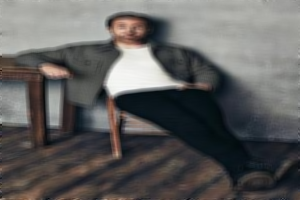

In [15]:
Gosling.filter(ImageFilter.BLUR)

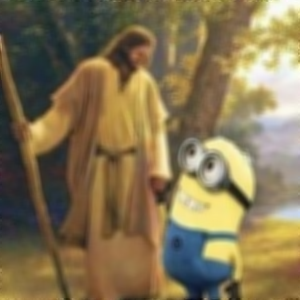

In [14]:
JesusMin.filter(ImageFilter.BLUR)

**Фильтр BoxBlur**  
BoxBlur — это параметризованный фильтр, имеющий один параметр под названием radius. Радиус принимает как целые, так и плавающие значения. Он будет проходить по всем пикселям изображения и брать среднее значение пикселей, которые попадают в радиус, указанный параметром. Если мы укажем радиус 1, то пиксель может иметь 9 окружающих пикселей, и среднее значение будет взято и присвоено новому значению пикселя. Обратите внимание, что у краевых пикселей будет меньше соседей.

Ниже мы попробовали наши изображения с радиусом 2, что позволит взять всех соседей, которые попадают в радиус 2 пикселя, и взять их среднее значение в качестве конечного значения.

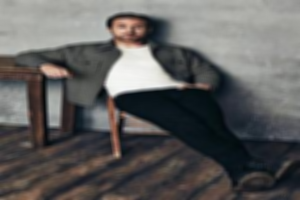

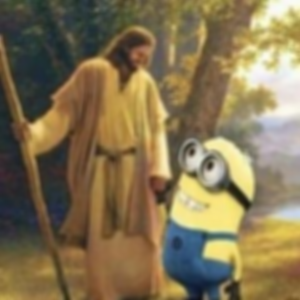

In [18]:
from IPython import display

blurred_home = Gosling.filter(ImageFilter.BoxBlur(radius=2))
blurred_kalam = JesusMin.filter(ImageFilter.BoxBlur(radius=2))

display.display(blurred_home, blurred_kalam)

**Размытие по Гауссу**   
Фильтр GaussianBlur — это тип фильтра размытия изображения, который применяет размытие к каждому пикселю на основе формулы Гаусса.
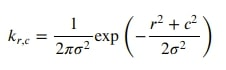  
Pillow - Фильтрация изображений в Python

Размытие по Гауссу отличается от обычных фильтров размытия, которые берут среднее значение всех соседних пикселей пикселя, что означает, что всем соседям назначается одинаковый вес (тем, которые находятся близко к пикселю, и тем, которые находятся немного дальше). Размытие по Гауссу назначает больший вес пикселям, которые находятся ближе к пикселю, и меньший вес тем, которые находятся дальше. Это приводит к меньшей потере данных по сравнению с теми простыми фильтрами размытия, которые просто берут среднее значение соседних пикселей изображения.

Фильтр GaussianBlur имеет параметр с именем radius, который имеет то же значение, что и BoxBlur. Ниже мы применили GaussianBlur с различными значениями радиуса к нашим изображениям.

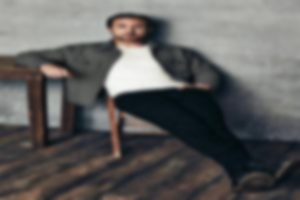

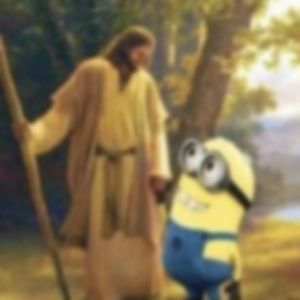

In [19]:
gauss_blurr_home = Gosling.filter(ImageFilter.GaussianBlur(radius=2))
gauss_blurr_kalam = JesusMin.filter(ImageFilter.GaussianBlur(radius=2))

display.display(gauss_blurr_home, gauss_blurr_kalam)

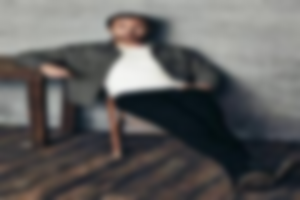

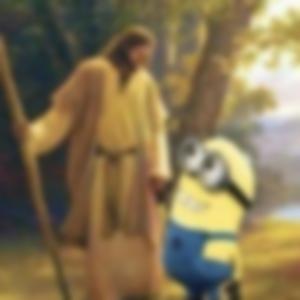

In [20]:
gauss_blurr_home = Gosling.filter(ImageFilter.GaussianBlur(radius=3))
gauss_blurr_kalam = JesusMin.filter(ImageFilter.GaussianBlur(radius=3))

display.display(gauss_blurr_home, gauss_blurr_kalam)

**Фильтр CONTOUR**  
Фильтр CONTOUR может помочь обнаружить края на изображении. Фильтр CONTOUR сворачивает указанное ниже ядро ​​3x3 на нашем изображении, чтобы сгенерировать отфильтрованное изображение. Это непараметризованный фильтр.

In [21]:
[[-1, -1, -1,],
 [-1,  8, -1,],
 [-1, -1, -1,]]

[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]

Ниже мы применили фильтр КОНТУР к обоим нашим изображениям.

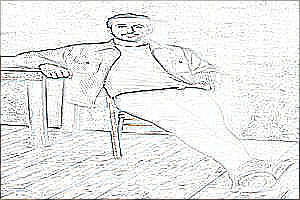

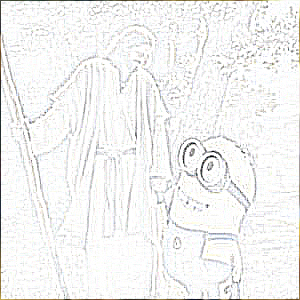

In [22]:
contour_home = Gosling.filter(ImageFilter.CONTOUR)
contour_kalam = JesusMin.filter(ImageFilter.CONTOUR)

display.display(contour_home, contour_kalam)

**Фильтр DETAIL**  
Фильтр DETAIL — это фильтр, который может улучшить изображение. Мы сворачиваем указанное ниже ядро ​​3x3 в изображение, чтобы сгенерировать отфильтрованное изображение с помощью этого фильтра.

In [23]:
[[0,  -1,  0],
 [-1, 10, -1],
 [0,  -1,  0]]

[[0, -1, 0], [-1, 10, -1], [0, -1, 0]]

Этот фильтр придает больше веса центральному пикселю и меньше — окружающему пикселю, чтобы улучшить изображение. Ниже мы сгенерировали отфильтрованные изображения с использованием этого фильтра.

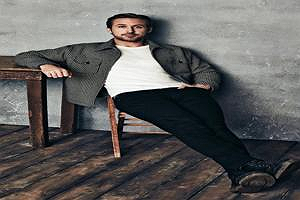

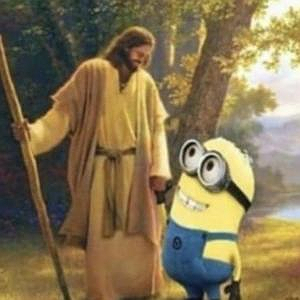

In [24]:
detail_home = Gosling.filter(ImageFilter.DETAIL)
detail_kalam = JesusMin.filter(ImageFilter.DETAIL)

display.display(detail_home, detail_kalam)